# Prereading study storyline
## Loading the data

In [1]:
%matplotlib inline
import scipy
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import sys
import getpass
import math

In [2]:
# from scipy import stats 
dfraw = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_160217_JBS_cleaned_051316.csv')
dfsurvey = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_addSurvey_160309_JBS_cleaned_051316.csv')
#please read this about unicode strings eventually: http://www.joelonsoftware.com/articles/Unicode.html


# Klugetastic: make a list, convert to an array and then a df
datalist = []
#header = df.keys()
topics = ['Blackbody','Masses','Resonance']
treatments = ['TextThenPhet','PhetThenText','TextOnly']


#merge with main dataframe
dfmerged = pd.merge(left=dfraw,right=dfsurvey, left_on='anon-id', right_on='anon-id')

phetquestion = {'Blackbody':'q01 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Masses':'q5 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Resonance':'q6 - Approximately how long did you spend with the PhET simulation? (in minutes)'}
textquestion = {'Blackbody':'q02 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Masses':'q6 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Resonance':'q7 - Approximately how long did you spend reading the textbook sections? (in minutes)'}

conv_pos = {'nan':np.nan, 'Not at all':0.0, 'Somewhat':1.0, 'Mostly':2.0, 'Definitely':3.0}
conv_neg = {'nan':np.nan, 'Not at all':3.0, 'Somewhat':2.0, 'Mostly':1.0, 'Definitely':0.0}

encountered_question = {'Blackbody':'q03 -  Have you learned about blackbody radiation before? (Choose all that apply.)',
                        'Masses':'q7 - Have you learned about simple harmonic motion before? (Choose all that apply.)',
                        'Resonance':'q8 - Have you learned about resonance before? (Choose all that apply.)'}

def transform_encountered(response):
    response = str(response)
    if response == 'No.':
        return False
    if 'Yes' in response:
        return True
    else: 
        return np.nan

def lickert_convert(response):
    return float(conv_neg[str(response).split('<')[0]])

def compute_survey(responses):
    NAs = 0
    newresponses = []
    for s in responses:
        if s != np.nan:
            newresponses.append(s)
    return sum(newresponses)/len(newresponses)

#now we iterate through the dataframe and creat a row per student x topic
for index, row in dfmerged.iterrows():
    for topic in topics:
        #print row['q5 - For me personally; PhET Sims are usually useless.']
#         calculated_survey = compute_survey([lickert_convert(row['q2 - For me personally; PhET Sims are usually boring.']),
#                     lickert_convert(row['q5 - For me personally; PhET Sims are usually useless.']),
#                     lickert_convert(row['q4 - For me personally; PhET Sims are usually fun.']),
#                     lickert_convert(row['q3 - For me personally; PhET Sims are usually productive.'])])
        datalist.append([str(row['anon-id']),
                        str(row["Reading group_x"]),
                        float(str(row['PreScore.'+topic]).replace('%',''))/100.0,
                        topic,
                        row['Treatment.'+topic+'_x'],
                        float(str(row['PostScore.'+topic]).replace('%',''))/100.0,
                        float(str(row['ClickerScore.'+topic]).replace('%',''))/100.0,
                        row[textquestion[topic]],
                        row[phetquestion[topic]],
#                         calculated_survey,
                        row['q9 - How beneficial was this assignment to your learning?'],
                        row['q10 - How much did you enjoy this assignment?'],
                        transform_encountered(row[encountered_question[topic]])
                        ])

# convert list2 to an array then a dataframe
array2 = np.array(datalist)
colnames = ['student id',"Reading group",'Prescore','Topic','Treatment',
            'Postscore','Clickerscore','Time on text','Time on PhET',
#             'Preattitude',
            'Postattitude - benefitted','Postattitude - enjoyed','Encountered']
df = pd.DataFrame(array2,columns=colnames)

# Organizing the dataframe
#### Now that we have our data frame we can see what it looks like:

In [3]:
df

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Postattitude - benefitted,Postattitude - enjoyed,Encountered
0,5963,3,nan,Blackbody,TextOnly,1.0,0.67,nan,nan,Not very beneficial.,Somewhat enjoyed it.,nan
1,5963,3,nan,Masses,TextThenPhet,1.0,1.0,25.0,7.0,Not very beneficial.,Somewhat enjoyed it.,True
2,5963,3,nan,Resonance,PhetThenText,0.67,0.33,20.0,6.0,Not very beneficial.,Somewhat enjoyed it.,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,nan,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan
4,25630,1,0.0,Masses,TextOnly,0.0,0.75,20.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,True
5,25630,1,1.0,Resonance,TextThenPhet,0.67,0.0,20.0,10.0,Somewhat beneficial.,Somewhat enjoyed it.,True
6,41441,1,0.67,Blackbody,PhetThenText,0.67,0.67,nan,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan
7,41441,1,0.0,Masses,TextOnly,0.0,0.75,30.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,False
8,41441,1,0.67,Resonance,TextThenPhet,0.33,0.0,15.0,8.0,Somewhat beneficial.,Somewhat enjoyed it.,False
9,51900,1,0.33,Blackbody,PhetThenText,1.0,0.67,nan,nan,nan,nan,nan


#### First we want to make sure that the columns containing numerical data are treated as such. Let's also collapse the post attitude columns

In [4]:
#converting columns to numerical types
for column in ['Prescore','Postscore','Clickerscore', 'Time on text','Time on PhET']:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.fillna(np.nan)
df = df.replace(to_replace='nan',value=np.nan)

def transform_enjoy(response):
    response = str(response)
    if 'No' in response or 'not' in response:
        return False
    elif 'enjoy' in response: 
        return True
    else: return np.nan
    
def transform_benefit(response):
    response = str(response)
    if 'Not' in response:
        return False
    elif 'beneficial' in response: 
        return True
    else: return np.nan
    
df['Benefitted'] = df['Postattitude - benefitted'].apply(transform_benefit)
df['Enjoyed'] = df['Postattitude - enjoyed'].apply(transform_enjoy)
df.head()

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Postattitude - benefitted,Postattitude - enjoyed,Encountered,Benefitted,Enjoyed
0,5963,3,NaN,Blackbody,TextOnly,1.00,0.67,NaN,NaN,Not very beneficial.,Somewhat enjoyed it.,NaN,False,True
1,5963,3,NaN,Masses,TextThenPhet,1.00,1.00,25.0,7.0,Not very beneficial.,Somewhat enjoyed it.,True,False,True
2,5963,3,NaN,Resonance,PhetThenText,0.67,0.33,20.0,6.0,Not very beneficial.,Somewhat enjoyed it.,True,False,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,NaN,NaN,Somewhat beneficial.,Somewhat enjoyed it.,NaN,True,True
4,25630,1,0.00,Masses,TextOnly,0.00,0.75,20.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,True,True,True


In [5]:
df_copy = df.copy()
df_copy['D'] = 1
table = pd.pivot_table(df_copy, values='D', index=['Reading group', 'Treatment'],columns=['Topic'], aggfunc=np.sum)
table

Topic                       Blackbody  Masses  Resonance
Reading group Treatment                                 
1             PhetThenText      165.0     2.0        NaN
              TextOnly            NaN   151.0        NaN
              TextThenPhet        NaN     NaN      143.0
2             PhetThenText        NaN   150.0        NaN
              TextOnly            NaN     NaN      134.0
              TextThenPhet      163.0     NaN        NaN
3             PhetThenText        NaN     3.0      148.0
              TextOnly          169.0     NaN        NaN
              TextThenPhet        NaN   142.0        NaN

#### Some students didn't do the assignment for the right topic/treatment so we eliminate them.

In [6]:
df = df[(df['Reading group']!='3') | (df['Topic']!='Masses') | (df['Treatment']!='PhetThenText')]
df = df[(df['Reading group']!='1') | (df['Topic']!='Masses') | (df['Treatment']!='PhetThenText')]

In [7]:
#exporting data
#df.to_csv(path_or_buf='C:\Users\\'+getpass.getuser()+'\Desktop\Data_per_student_per_treatment_03062016.csv', sep=',',na_rep="NA", header=True, index=False)

#### Unfortunately we have a lot of rows with missing data. If we remove them, we end up with almost half the dataset. We will use two datasets for our analysis.

In [51]:
df2 = df.dropna()
df_score = df[['Prescore','Postscore','Topic','Clickerscore','Treatment']].dropna()
df_time = df[['Time on PhET','Time on text','Topic','Treatment','Encountered','Postattitude - enjoyed','Postattitude - benefitted','Benefitted','Enjoyed']].dropna()
df2.shape, df.shape, df_score.shape, df_time.shape

((531, 14), (1528, 14), (1061, 5), (640, 9))

In [9]:
df_score.describe()

,Prescore,Postscore,Clickerscore
count,1061.000000,1061.000000,1061.000000
mean,0.317992,0.468718,0.612026
std,0.306917,0.340695,0.308439
min,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000
50%,0.330000,0.500000,0.670000
75%,0.500000,0.670000,1.000000
max,1.000000,1.000000,1.000000


# Descriptors
## Did the students learn?
#### Let's get a sense of what the students were doing. First let's compare their pre and post scores. In these boxplots, means are in green and medians in red.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000099088D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009BCB940>]], dtype=object)

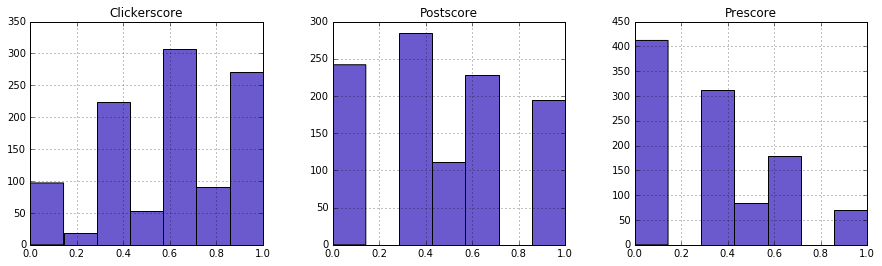

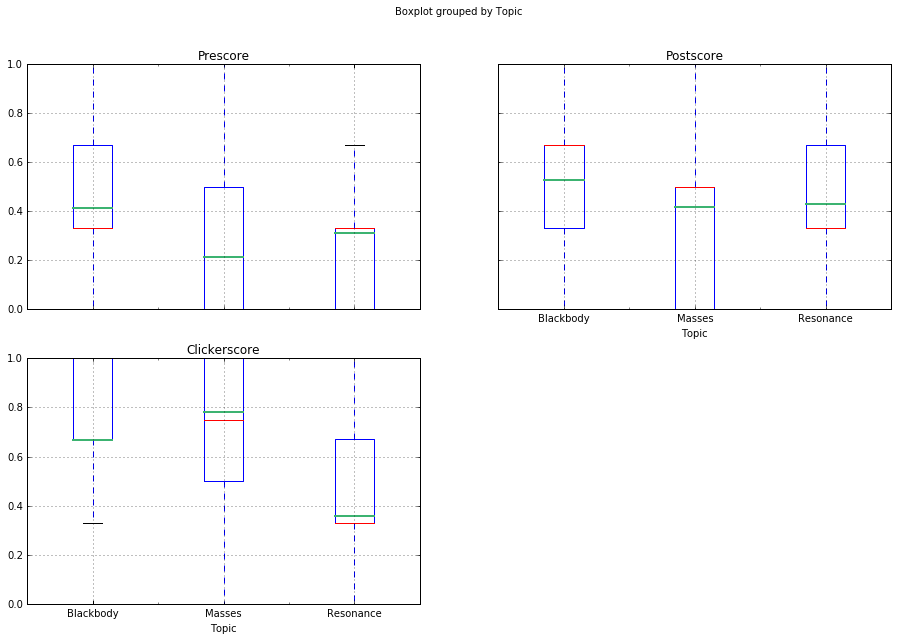

In [10]:
# df_score['diff'] = df['Prescore']-df['Postscore']
# df_score.hist(column=['Prescore','Postscore','diff'],bins=5, layout=(1,3),figsize=(15,4),color='slateblue')
# meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df_score.hist(column=['Prescore','Postscore','Clickerscore'],bins=7, layout=(1,3),figsize=(15,4),color='slateblue')
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df.boxplot(by='Topic',
                column=['Prescore','Postscore','Clickerscore'],
                figsize=(15,10),
                meanprops=meanlineprops, meanline=True, showmeans=True)

We can see from the histograms that we a wide spectrum of knowledge levels. The boxplots confirm that the student did indeed learn, as post-scores increased for all topics though in varying amounts per topic. We do a Mann-Whitney test (the equivalent a simple t-test for non normal data) to find out if the difference in score is significant.

In [11]:
#from http://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used
scipy.stats.mstats.normaltest(df_score['Postscore']),scipy.stats.mstats.normaltest(df_score['Clickerscore'])

(NormaltestResult(statistic=314.97366418270531, pvalue=4.0210349720812256e-69),
 NormaltestResult(statistic=94.588230987963385, pvalue=2.8868659256727557e-21))

#### Our postscore and clickerscore data is not normal!

In [12]:
m = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Postscore'])
r = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Postscore'])
b = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Postscore'])
print("The significance of the post score difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the post score difference is:
WilcoxonResult(statistic=1645.0, pvalue=1.2352473059906735e-16) for Masses, 
WilcoxonResult(statistic=6157.5, pvalue=7.1031929202349846e-09) for Resonance, 
WilcoxonResult(statistic=6276.0, pvalue=8.2879438215317674e-10) for Blackbody


In [13]:
m = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Clickerscore'])
r = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Clickerscore'])
b = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Clickerscore'])
print("The significance of the clickerscore difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the clickerscore difference is:
WilcoxonResult(statistic=513.0, pvalue=3.1155163925668978e-48) for Masses, 
WilcoxonResult(statistic=8869.5, pvalue=0.00086276300276209275) for Resonance, 
WilcoxonResult(statistic=4634.5, pvalue=1.6308634531726238e-31) for Blackbody


In [14]:
df_score[df_score['Topic']=='Masses'].describe()

,Prescore,Postscore,Clickerscore
count,324.000000,324.000000,324.000000
mean,0.208333,0.427469,0.789352
std,0.315677,0.399479,0.249989
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.750000
50%,0.000000,0.500000,0.750000
75%,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [15]:
df_score[df_score['Topic']=='Resonance'].describe()

,Prescore,Postscore,Clickerscore
count,342.000000,342.000000,342.000000
mean,0.308129,0.435117,0.366959
std,0.283272,0.319250,0.256315
min,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000
50%,0.330000,0.330000,0.330000
75%,0.330000,0.670000,0.670000
max,1.000000,1.000000,1.000000


In [16]:
df_score[df_score['Topic']=='Blackbody'].describe()

,Prescore,Postscore,Clickerscore
count,395.000000,395.000000,395.000000
mean,0.416481,0.531646,0.678759
std,0.287378,0.294774,0.255734
min,0.000000,0.000000,0.000000
25%,0.330000,0.330000,0.670000
50%,0.330000,0.670000,0.670000
75%,0.670000,0.670000,1.000000
max,1.000000,1.000000,1.000000


## How much were they engaged in the activity?
#### Next let's look at how much time they spent on each activity.

In [17]:
df_time['Time on text'].describe()

count    743.000000
mean      33.634590
std       28.389238
min        0.000000
25%       15.000000
50%       30.000000
75%       44.000000
max      300.000000
Name: Time on text, dtype: float64

In [54]:
df_time2 = df_time[df_time['Treatment']!='TextOnly']
df_time2['Time on PhET'].describe()

count    428.000000
mean      10.088785
std       11.075283
min        0.000000
25%        5.000000
50%       10.000000
75%       10.000000
max      180.000000
Name: Time on PhET, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000902FBA8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A69B160>], dtype=object)

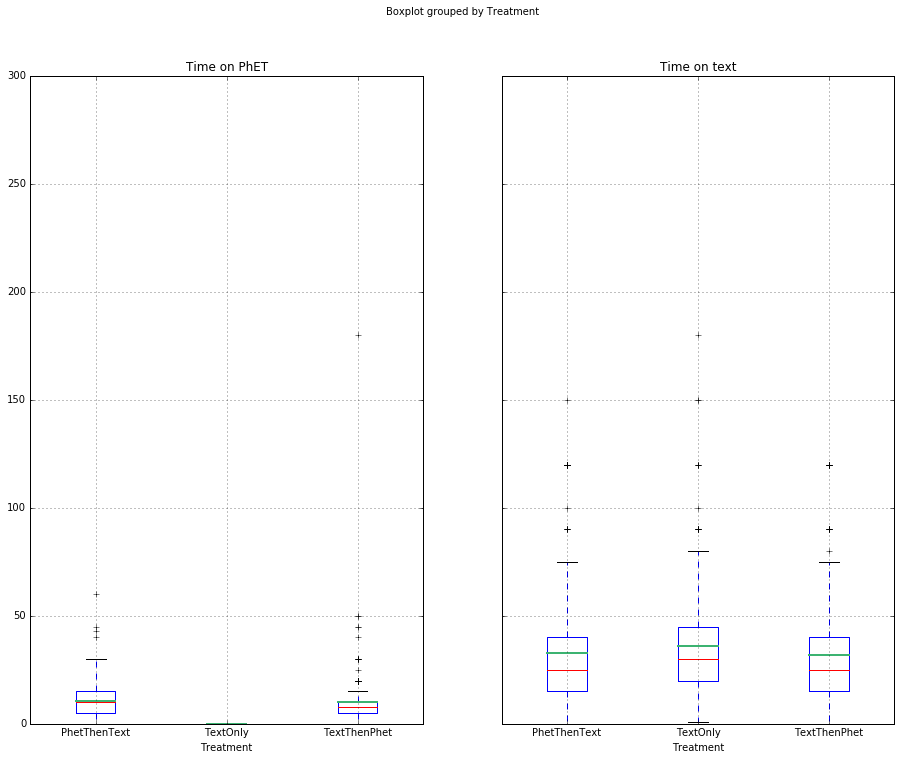

In [19]:
df_time.boxplot(by='Treatment',
                column=['Time on PhET','Time on text'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

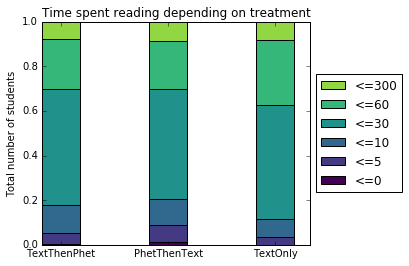

In [20]:
maxtime = int(np.max(df_time['Time on text']))
slices = [0,5,10,30,60,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['Time on text']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['Time on text']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent reading depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

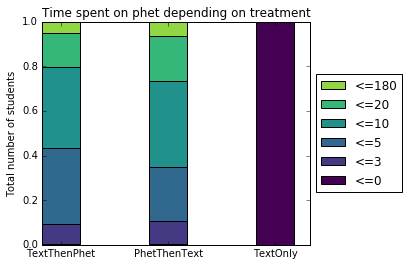

In [21]:
maxtime = int(np.max(df_time['Time on PhET']))
slices = [0,3,5,10,20,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['Time on PhET']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['Time on PhET']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent on phet depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

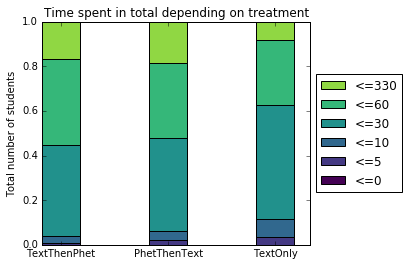

In [22]:
df_time['total time']=df_time['Time on text']+ df_time['Time on PhET']
maxtime = int(np.max(df_time['total time']))
slices = [0,5,10,30,60,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['total time']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['total time']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent in total depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

In [23]:
df_time[df_time['Treatment']=='TextThenPhet'].shape, df_time[df_time['Treatment']=='PhetThenText'].shape, df_time[df_time['Treatment']=='TextOnly'].shape

((245, 8), (255, 8), (243, 8))

In [24]:
p = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on PhET'],df_time[df_time['Treatment']=='PhetThenText']['Time on PhET'])
t = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],df_time[df_time['Treatment']=='PhetThenText']['Time on text'])
print("The significance of difference between time on task of conditions PhetThenText and TextThenPhet:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions PhetThenText and TextThenPhet:
MannwhitneyuResult(statistic=28601.5, pvalue=0.094920983214969251) for Phet, 
MannwhitneyuResult(statistic=31960.0, pvalue=0.65276057947284805) for text


#### Now that we know that time spent reading are similar for the "phet" conditions, let's compare each 'PhET' condition to the "Textonly" condition

In [25]:
p1 = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
p2 = mannwhitneyu(df_time[df_time['Treatment']=='PhetThenText']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
print("The significance of difference between time reading compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The significance of difference between time reading compared to 'TextOnly' condition for 
PhetThenText: MannwhitneyuResult(statistic=25998.0, pvalue=0.014806525195323326) 
and TextThenPhet: MannwhitneyuResult(statistic=26476.0, pvalue=0.0047018545689846902)


In [26]:
p1 = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['total time'],
             df_time[df_time['Treatment']=='TextOnly']['total time'])
p2 = mannwhitneyu(df_time[df_time['Treatment']=='PhetThenText']['total time'],
             df_time[df_time['Treatment']=='TextOnly']['total time'])
print("The significance of difference between time overall compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The significance of difference between time overall compared to 'TextOnly' condition for 
PhetThenText: MannwhitneyuResult(statistic=34024.5, pvalue=0.0061298566781711836) 
and TextThenPhet: MannwhitneyuResult(statistic=35265.5, pvalue=0.0074122498373376837)


## Prior and knowledge and attitude influence on engagement
#### If they already encountered the topic were they more likely to score well on the pretest?

In [27]:
df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')].shape, df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')].shape, df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')].shape, df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')].shape

((146, 14), (110, 14), (91, 14), (184, 14))

In [28]:
m0 = mannwhitneyu(df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')]['Prescore'])
print("The significance of difference between having encountered the topic 'Masses' on prescore {0}".format(m0))

The significance of difference between having encountered the topic 'Masses' on prescore MannwhitneyuResult(statistic=5460.0, pvalue=0.0041033250837857246)


In [29]:
m0 = mannwhitneyu(df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')]['Prescore'])
print("The significance of difference between having encountered the topic 'Resonance' on prescore {0}".format(m0))

The significance of difference between having encountered the topic 'Resonance' on prescore MannwhitneyuResult(statistic=8085.5, pvalue=0.002067685112211482)


In [30]:
#No encounter data for "blackbody" topic so we can't repreat the analysis for that topic

#### If they already encountered the topic were they more likely to be engaged?¶

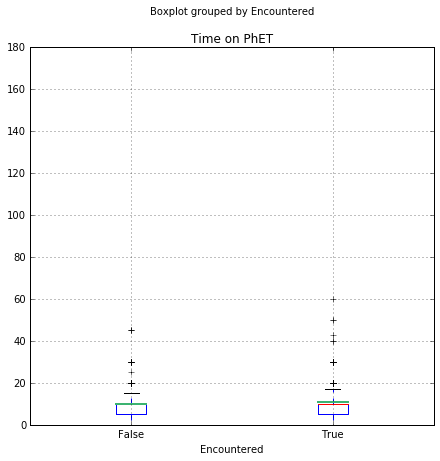

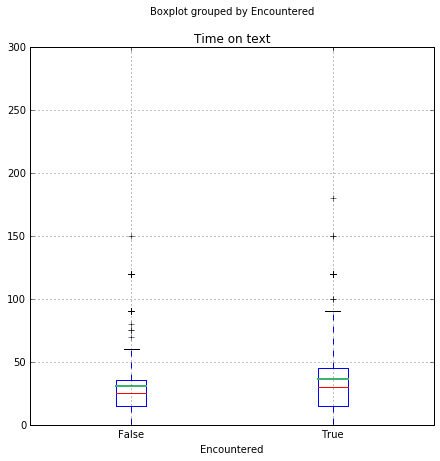

In [31]:
df_time[df_time['Treatment']!='TextOnly'].boxplot(by='Encountered',
                column=['Time on PhET'],
                figsize=(7,7),
                meanprops=meanlineprops, meanline=True, showmeans=True)
df_time.boxplot(by='Encountered',
                column=['Time on text'],
                figsize=(7,7),
                meanprops=meanlineprops, meanline=True, showmeans=True)

In [32]:
p = mannwhitneyu(df_time[(df_time['Encountered']=='True') & (df_time['Treatment']!='TextOnly')]['Time on PhET'],
                 df_time[(df_time['Encountered']=='False') & (df_time['Treatment']!='TextOnly')]['Time on PhET'])
t = mannwhitneyu(df_time[df_time['Encountered']=='True']['Time on text'],df_time[df_time['Encountered']=='False']['Time on text'])
print("The significance of difference between time on task of conditions depending on if they encountered the topic previously:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions depending on if they encountered the topic previously:
MannwhitneyuResult(statistic=32473.0, pvalue=0.4020947747424013) for Phet, 
MannwhitneyuResult(statistic=75321.5, pvalue=0.024507422717818236) for text


#### If they enjoyed the activity, were they more likely to be engaged?

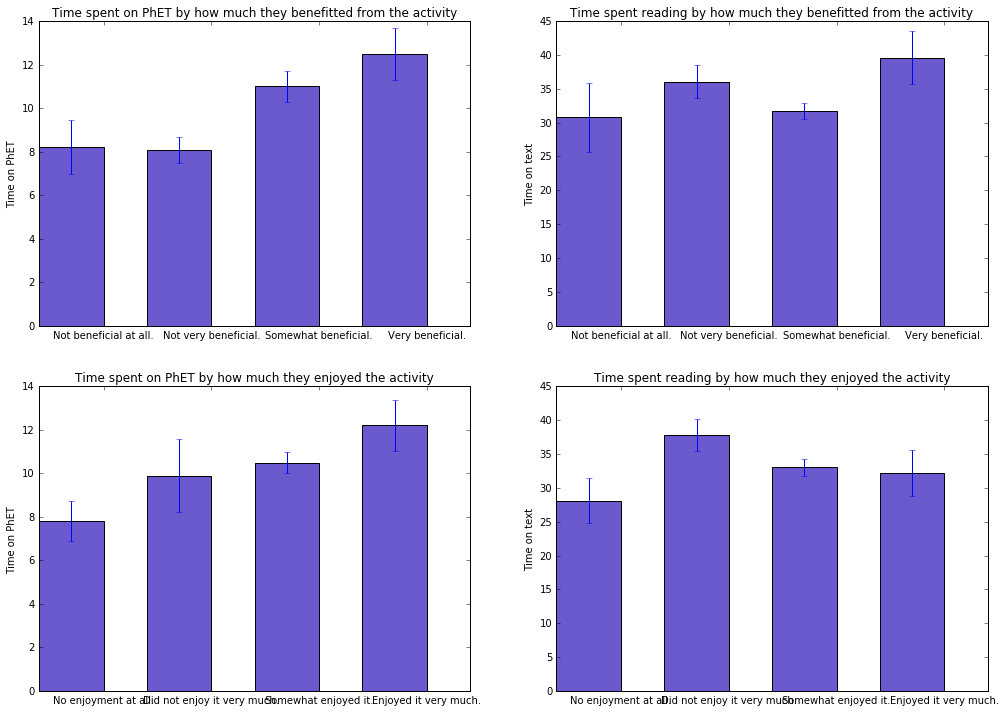

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(17,12))
options = ['Not beneficial at all.','Not very beneficial.','Somewhat beneficial.','Very beneficial.']
N = len(options)

ax = axs[0][0]
means = [np.mean(df_time2[df_time2['Postattitude - benefitted']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Postattitude - benefitted']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)

ax = axs[0][1]
means = [np.mean(df_time[df_time['Postattitude - benefitted']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Postattitude - benefitted']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)

options = ['No enjoyment at all.','Did not enjoy it very much.','Somewhat enjoyed it.','Enjoyed it very much.']
N = len(options)

ax = axs[1][0]
means = [np.mean(df_time2[df_time2['Postattitude - enjoyed']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Postattitude - enjoyed']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)

ax = axs[1][1]
means = [np.mean(df_time[df_time['Postattitude - enjoyed']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Postattitude - enjoyed']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)


In [53]:
df_time

,Time on PhET,Time on text,Topic,Treatment,Encountered,Postattitude - enjoyed,Postattitude - benefitted,Benefitted,Enjoyed
1,7.0,25.0,Masses,TextThenPhet,True,Somewhat enjoyed it.,Not very beneficial.,False,True
2,6.0,20.0,Resonance,PhetThenText,True,Somewhat enjoyed it.,Not very beneficial.,False,True
4,0.0,20.0,Masses,TextOnly,True,Somewhat enjoyed it.,Somewhat beneficial.,True,True
5,10.0,20.0,Resonance,TextThenPhet,True,Somewhat enjoyed it.,Somewhat beneficial.,True,True
7,0.0,30.0,Masses,TextOnly,False,Somewhat enjoyed it.,Somewhat beneficial.,True,True
8,8.0,15.0,Resonance,TextThenPhet,False,Somewhat enjoyed it.,Somewhat beneficial.,True,True
16,8.0,120.0,Masses,PhetThenText,True,Somewhat enjoyed it.,Somewhat beneficial.,True,True
17,0.0,40.0,Resonance,TextOnly,True,Somewhat enjoyed it.,Somewhat beneficial.,True,True
19,10.0,10.0,Masses,TextThenPhet,True,Somewhat enjoyed it.,Somewhat beneficial.,True,True
20,20.0,10.0,Resonance,PhetThenText,True,Somewhat enjoyed it.,Somewhat beneficial.,True,True


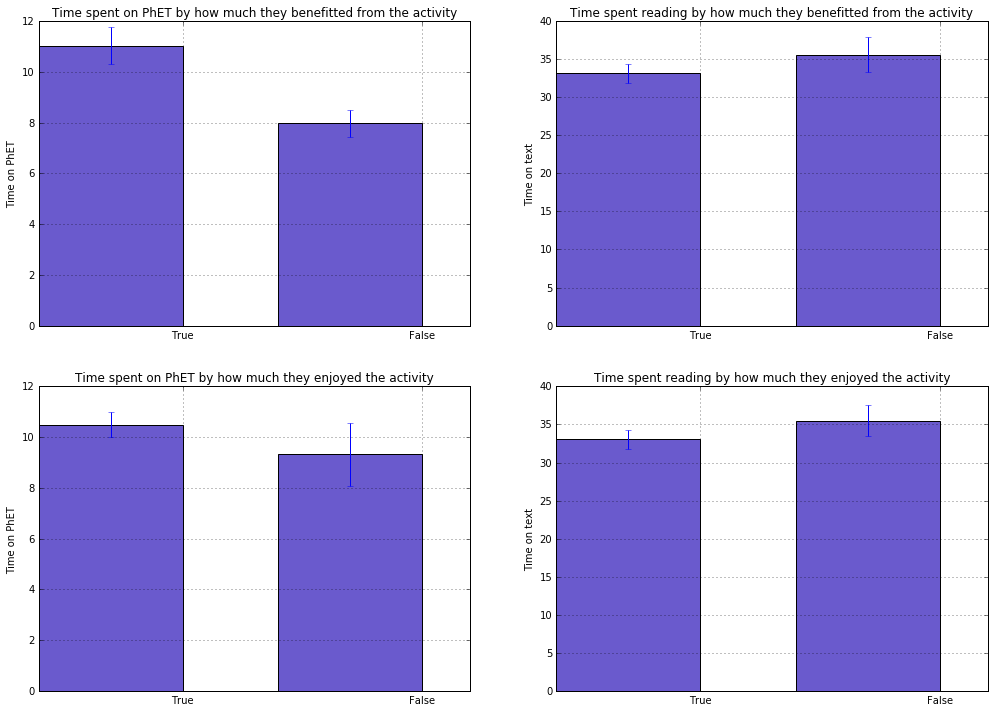

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(17,12))
options = [True,False]
N = len(options)

ax = axs[0][0]
means = [np.mean(df_time2[df_time2['Benefitted']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Benefitted']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

ax = axs[0][1]
means = [np.mean(df_time[df_time['Benefitted']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Benefitted']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

options = [True,False]
N = len(options)

ax = axs[1][0]
means = [np.mean(df_time2[df_time2['Enjoyed']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Enjoyed']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

ax = axs[1][1]
means = [np.mean(df_time[df_time['Enjoyed']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Enjoyed']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

means

In [34]:
# np.mean(df_time[df_time['Postattitude - enjoyed']=='Somewhat enjoyed it.']['Time on PhET'])
# # df_time['Postattitude - enjoyed']

#### If they benefitted from the activity, were they more likely to be engaged?

# Performance analysis by engagement
## Visual investigation of effect of engagement

In [35]:
df3 = df2[df2['Treatment']!='TextOnly']
eng_levels_phet = (np.percentile(df3['Time on PhET'],33), np.percentile(df3['Time on PhET'],66))
eng_levels_text = (np.percentile(df2['Time on text'],33), np.percentile(df2['Time on text'],66))
eng_levels_phet, eng_levels_text
# np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore'])/math.sqrt(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])].shape[0])

((5.0, 10.0), (20.0, 30.0))

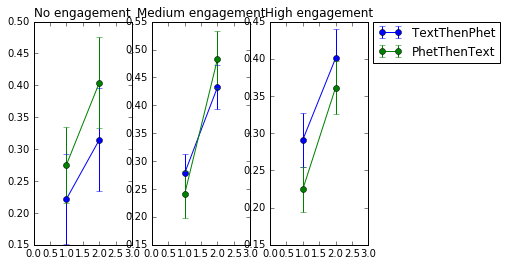

In [36]:
##show line plots with x = pre to post, colored by condition, grouped by engagement level
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
shape_treatment={'TextThenPhet':'-','TextOnly':'.','PhetThenText':'.-'}
treatments_to_use = ['TextThenPhet','PhetThenText']


ax = axs[0]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('No engagement')

ax = axs[1]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('Medium engagement')

ax = axs[2]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('High engagement')

ax.set_xlim([0,3])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

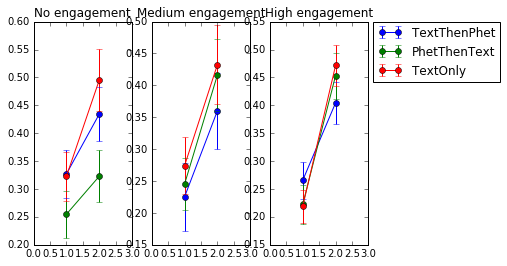

In [37]:
ax.set_xlim([0,3])##show line plots with x = pre to post, colored by condition, grouped by engagement level
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
shape_treatment={'TextThenPhet':'-','TextOnly':'.','PhetThenText':'.-'}

ax = axs[0]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('No engagement')

ax = axs[1]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('Medium engagement')

ax = axs[2]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('High engagement')

ax.set_xlim([0,3])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Postscore analysis
#### Next let's group by engagement and see if there is a different in performance.

In [38]:
import statsmodels.formula.api as smf
# formula = '''df_score["Postscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
# glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
# res = glm_f_binom.fit()
# print(res.summary())

mod = smf.ols(formula= '''Postscore ~ Prescore + Topic*Treatment''', data=df_score)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Postscore   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     21.45
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           1.45e-33
Time:                        15:29:56   Log-Likelihood:                -273.09
No. Observations:                1061   AIC:                             566.2
Df Residuals:                    1051   BIC:                             615.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.3740      0.031     12.060      0.000         0.313     0.435
Topic[T.Masses]                                 -0.0269      0.042     -0.644      0.520        -0.109     0.055
Topic[T.Resonance]                              -0.0968      0.040     -2.404      0.016        -0.176    -0.018
Treatment[T.TextOnly]                           -0.0162      0.039     -0.420      0.675        -0.092     0.059
Treatment[T.TextThenPhet]                       -0.0283      0.039     -0.724      0.470        -0.105     0.048
Topic[T.Masses]:Treatment[T.TextOnly]            0.0700      0.057      1.224      0.221        -0.042     0.182
Topic[T.Resonance]:Treatment[T.TextOnly]         0.0770      0.057      1.351      0.177        -0.035     0.189
Topic[T.Masses]:Treatment[T.TextThenPhet]       -0.0509      0.059     -0.868      0.386        -0.166     0.064
Topic[T.Resonance]:Treatment[T.TextThenPhet]     0.0611      0.057      1.078      0.281        -0.050     0.172
Prescore                                         0.4139      0.033     12.586      0.000         0.349     0.478
==============================================================================
Omnibus:                       43.143   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.808
Skew:                           0.282   Prob(JB):                     5.55e-07
Kurtosis:                       2.422   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# fig, ax = plt.subplots(figsize=(15,20))
# fig = sm.graphics.plot_partregress_grid(res, fig=fig)

## Clickerscore analysis

In [42]:
# formula = '''df_score["Clickerscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
# glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
# res = glm_f_binom.fit()
# print(res.summary())

mod = smf.ols(formula= '''Clickerscore ~ Prescore + Topic*Treatment''', data=df_score)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Clickerscore   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     60.74
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           1.83e-89
Time:                        15:51:56   Log-Likelihood:                -34.846
No. Observations:                1061   AIC:                             89.69
Df Residuals:                    1051   BIC:                             139.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.6181      0.025     24.949      0.000         0.570     0.667
Topic[T.Masses]                                  0.1250      0.033      3.738      0.000         0.059     0.191
Topic[T.Resonance]                              -0.3016      0.032     -9.376      0.000        -0.365    -0.238
Treatment[T.TextOnly]                            0.0399      0.031      1.296      0.195        -0.020     0.100
Treatment[T.TextThenPhet]                       -0.0234      0.031     -0.748      0.454        -0.085     0.038
Topic[T.Masses]:Treatment[T.TextOnly]           -0.0009      0.046     -0.020      0.984        -0.091     0.089
Topic[T.Resonance]:Treatment[T.TextOnly]        -0.0074      0.046     -0.162      0.872        -0.097     0.082
Topic[T.Masses]:Treatment[T.TextThenPhet]        0.0397      0.047      0.848      0.396        -0.052     0.132
Topic[T.Resonance]:Treatment[T.TextThenPhet]     0.0232      0.045      0.513      0.608        -0.066     0.112
Prescore                                         0.1308      0.026      4.980      0.000         0.079     0.182
==============================================================================
Omnibus:                       36.978   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.681
Skew:                          -0.446   Prob(JB):                     3.99e-09
Kurtosis:                       2.721   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# formula = '''df_score["Clickerscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
# glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
# res = glm_f_binom.fit()
# print(res.summary())

mod = smf.ols(formula= '''Clickerscore ~ Postscore + Topic*Treatment''', data=df_score)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Clickerscore   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     63.93
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           1.75e-93
Time:                        15:51:01   Log-Likelihood:                -25.390
No. Observations:                1061   AIC:                             70.78
Df Residuals:                    1051   BIC:                             120.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.5914      0.025     23.505      0.000         0.542     0.641
Topic[T.Masses]                                  0.1114      0.033      3.417      0.001         0.047     0.175
Topic[T.Resonance]                              -0.2964      0.032     -9.302      0.000        -0.359    -0.234
Treatment[T.TextOnly]                            0.0407      0.030      1.335      0.182        -0.019     0.101
Treatment[T.TextThenPhet]                       -0.0218      0.031     -0.704      0.482        -0.083     0.039
Topic[T.Masses]:Treatment[T.TextOnly]           -0.0093      0.045     -0.205      0.838        -0.098     0.080
Topic[T.Resonance]:Treatment[T.TextOnly]        -0.0170      0.045     -0.376      0.707        -0.106     0.072
Topic[T.Masses]:Treatment[T.TextThenPhet]        0.0561      0.046      1.211      0.226        -0.035     0.147
Topic[T.Resonance]:Treatment[T.TextThenPhet]     0.0182      0.045      0.406      0.685        -0.070     0.106
Postscore                                        0.1513      0.023      6.644      0.000         0.107     0.196
==============================================================================
Omnibus:                       32.897   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.034
Skew:                          -0.434   Prob(JB):                     2.47e-08
Kurtosis:                       2.803   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interestingly, low or no effect by the prescore on the clickerscore when including the post-score as a covariate... A high effect by post-score! No effect on their interaction. Which means that the postscore was a better indicator than prescore and that the effect by the prescore is included in the post-score. Thus the reading assignment was an equalizing force!

In [44]:
mod = smf.ols(formula= '''Clickerscore ~ Prescore*Postscore + Topic*Treatment''', data=df_score)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Clickerscore   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     53.33
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           2.29e-93
Time:                        16:06:03   Log-Likelihood:                -21.388
No. Observations:                1061   AIC:                             66.78
Df Residuals:                    1049   BIC:                             126.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.5711      0.027     20.827      0.000         0.517     0.625
Topic[T.Masses]                                  0.1284      0.033      3.880      0.000         0.063     0.193
Topic[T.Resonance]                              -0.2893      0.032     -9.074      0.000        -0.352    -0.227
Treatment[T.TextOnly]                            0.0419      0.030      1.379      0.168        -0.018     0.102
Treatment[T.TextThenPhet]                       -0.0197      0.031     -0.638      0.524        -0.080     0.041
Topic[T.Masses]:Treatment[T.TextOnly]           -0.0098      0.045     -0.217      0.829        -0.098     0.079
Topic[T.Resonance]:Treatment[T.TextOnly]        -0.0171      0.045     -0.379      0.705        -0.106     0.071
Topic[T.Masses]:Treatment[T.TextThenPhet]        0.0461      0.046      0.996      0.319        -0.045     0.137
Topic[T.Resonance]:Treatment[T.TextThenPhet]     0.0155      0.045      0.345      0.730        -0.072     0.103
Prescore                                         0.0771      0.049      1.560      0.119        -0.020     0.174
Postscore                                        0.1257      0.032      3.960      0.000         0.063     0.188
Prescore:Postscore                               0.0025      0.073      0.034      0.973        -0.140     0.145
==============================================================================
Omnibus:                       32.505   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.996
Skew:                          -0.420   Prob(JB):                     4.15e-08
Kurtosis:                       2.751   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TODO

* effect size wilcoxon

* check why transform to benefitted and enjoy didn't work

* mean_std for ben+enj

* man-whitney on ben+enj